    Group members: 
    
    Zhonghao Pan     (NetID: zp3)
    Xiaoqi Bi        (NetID:xiaoqib2)
    Jiahao Liang     (NetID: )


In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np  
import datetime
from scipy import stats as st
from datetime import datetime

# Task 0

## Question 1: Import decoded CSV using pandas

In [2]:
totalmiles = pd.read_csv('mp1_av_totalmiles.csv')
disengagements = pd.read_csv('mp1_av_disengagements.csv')

## Question 2: Summarize the following information

### Total number of AV disengagements over the entire duration of available data

In [31]:
print(len(disengagements))

1024


### Number of unique months that have recorded AV disengagements


In [32]:
print(disengagements.columns)

Index(['Month', 'Car', 'Location', 'Weather', 'TypeOfTrigger', 'ReactionTime',
       'Cause'],
      dtype='object')


In [33]:
disengagements['Month'].unique()

array(['14-Sep', '14-Oct', '14-Nov', '14-Dec', '15-Jan', '15-Feb',
       '15-Mar', '15-Apr', '15-May', '15-Jun', '15-Jul', '15-Aug',
       '15-Sep', '15-Oct', '15-Nov'], dtype=object)

### List of unique locations of AV disengagements

In [34]:
disengagements['Location'].unique()

array(['urban-street', 'highway'], dtype=object)

### Number of unique causes for AV disengagements

In [35]:
disengagements['Cause'].unique()

array(['Incorrect Traffic Light Detection',
       'Adverse road surface conditions', 'Position Estimation Failure',
       'Emergency Vehicle', 'Software Froze', 'Hardware Fault',
       'Incorrect behavior prediction of others',
       'Recklessly behaving agent', 'System Tuning and Calibration',
       'Unwanted Driver Discomfort'], dtype=object)

### Which columns in the datasets (if any) have missing values? 

In [36]:
print(disengagements.count())
print(totalmiles.count())

Month            1024
Car              1024
Location         1024
Weather          1024
TypeOfTrigger    1024
ReactionTime      492
Cause            1024
dtype: int64
Month                                 17
Car                                   17
miles driven in autonomous mode       17
total number of disengagements        17
number of automatic disengagements    17
number of manual disengagements       17
dtype: int64


#### Only disengaement csv's ReactionTime has n/a

### How many missing values do these column(s) have?

In [37]:
disengagements['ReactionTime'].isnull().sum()

532

## Question 3: Plot a pie chart for the causes of AV disengagement. 

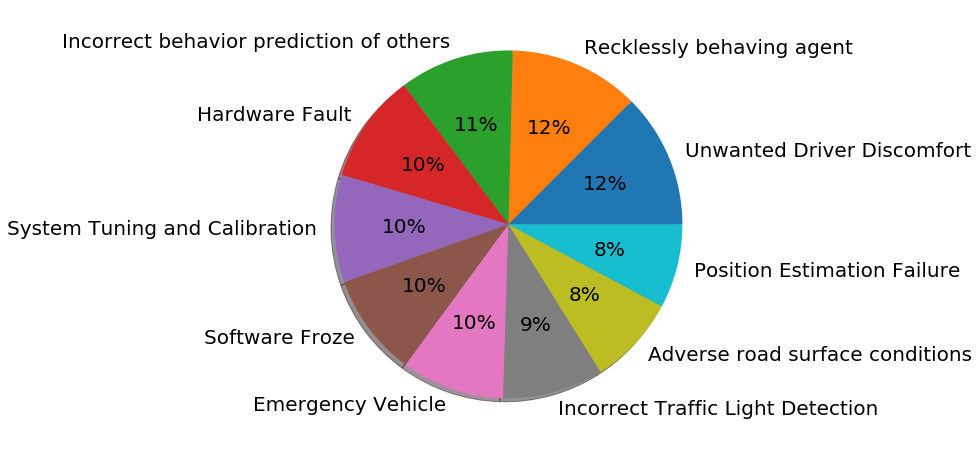

In [38]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

causes = disengagements['Cause'].value_counts()
causes = causes[causes>10]
patches, texts, _ = plt.pie(causes, 
        # grab labels from frame keys
        labels=causes.keys(),
        # some formatting
        autopct='%.0f%%', shadow=True)
#plt.legend(patches, labels=causes.keys(), bbox_to_anchor=(0.85,1.025),loc="upper left")
#plt.axis('equal')
plt.show()

### Based on the pie-chart, list the top 2 leading causes of disengagement?

#### Recklessly behaving agent (12%) & Unwanted Driver Discomfort (12%)

## Question 4: Visualize the trend of disengagement/mile over time with monthly granularity

In [39]:
disengagements.Month = pd.to_datetime(disengagements.Month, format='%y-%b')
disengagements.set_index('Month',inplace=True)

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

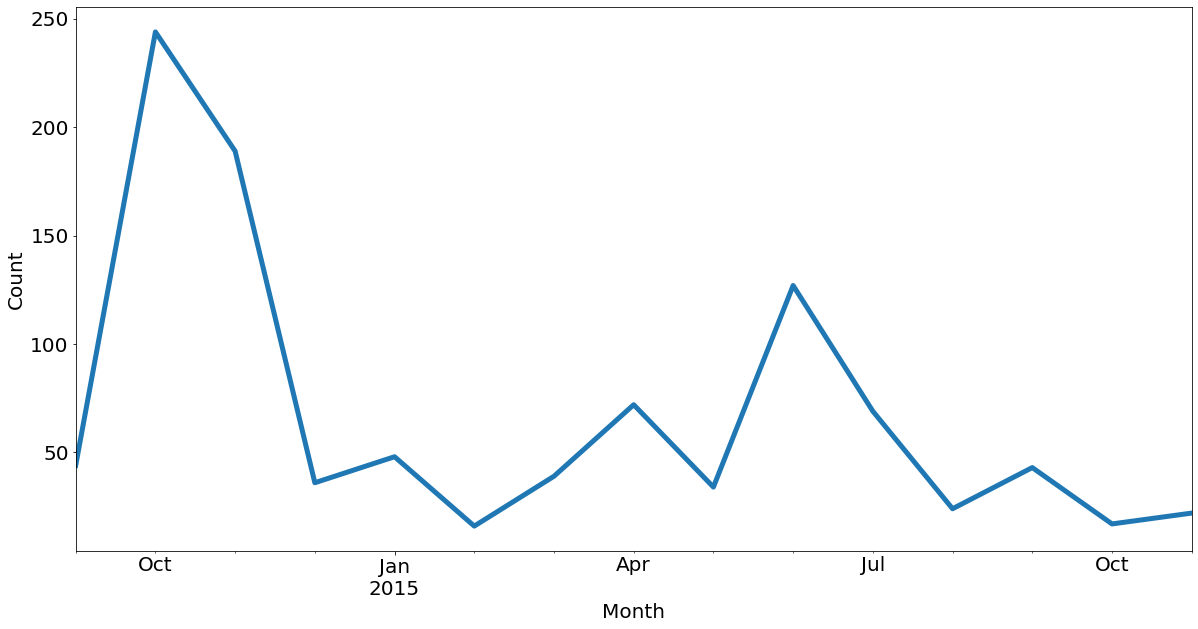

In [40]:
disengagements.groupby('Month').count()['Car'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month',fontsize=20);
plt.ylabel('Count',fontsize=20)
plt.title

### How would you describe the trend? 

#### Decressing trend.

### Are AV’s maturing over time?

#### Yes

# Task 1 – Basic Analysis of AV Disengagements

## Question 1: What do the following distributions signify about samples drawn from it

### Gaussian distribution

#### It's symmetrical, single peak

### Exponential distribution

#### Skew to the right

### Weibull distribution

#### ?

## Question 2: If the AV suddenly disengages, there may not be enough time for the human to react. It is also possible, that the human is not sufficiently attentive while in the AV because of reliance on the technology. To understand the human alertness level, we measure the reaction time of the human driver in the field. Plot the probability distribution of reaction times. 

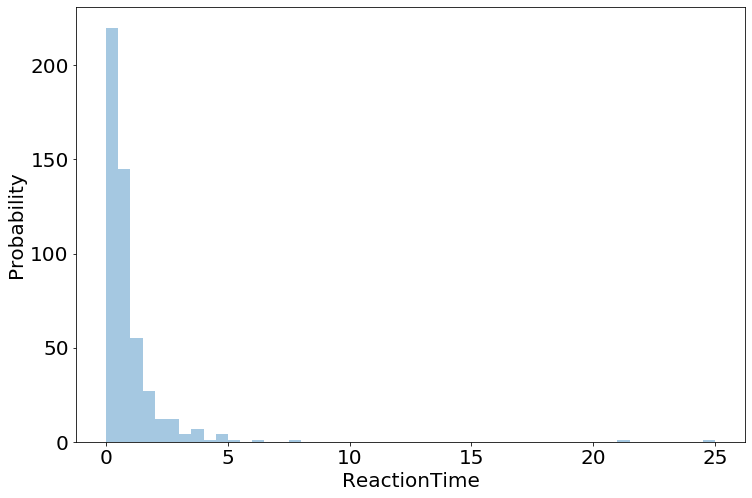

In [41]:
ax = sns.distplot(disengagements['ReactionTime'].dropna(), kde=False)
ax.set_ylabel('Probability')
plt.show()

###  Does this distribution fit any known distributions (Gaussian, Weibull,Exponential)?

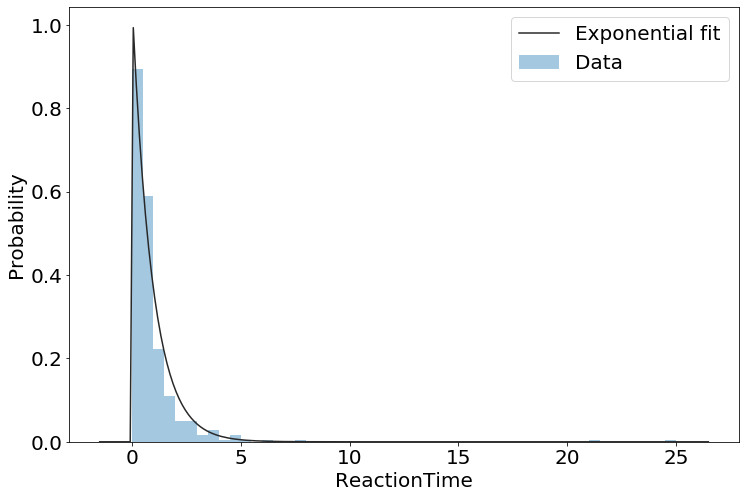

In [42]:
ax = sns.distplot(disengagements['ReactionTime'].dropna(), kde=False, fit=st.expon)#,bins=10)
ax.set_ylabel('Probability')
plt.legend(['Exponential fit', 'Data'])
plt.show()

### What does the fit distribution signify?

#### Since it fits the exponential distribution pretty well, ...

## Question 3: Compute the average reaction time

### For the entire duration of the dataset

In [43]:
disengagements['ReactionTime'].mean()

0.9297703252032526

### For the entire duration of the dataset differentiated by the location of disengagement

In [44]:
disengagements.groupby('Location')['ReactionTime'].mean()

Location
highway         1.48000
urban-street    0.92865
Name: ReactionTime, dtype: float64

## Question 4: It is known that the mean reaction time for humans in non-AV cars is 1.09 seconds. Is the mean reaction time for humans in AV cars different from non-AV cars? Perform a hypothesis testing at a 0.05 significance level.

In [45]:
from scipy import stats

reaction_times = disengagements['ReactionTime'].dropna()

stats.ttest_1samp(list(reaction_times),1.09)


Ttest_1sampResult(statistic=-2.0986037086235854, pvalue=0.03636206696694606)

### Since the p value = 0.036 < 0.05, we reject the null hypothesis and conclude that there is significant different between the mean reaction time for humnas in non-AV cars and human in AV cars.

## Question 5: Plot the probability distribution of disengagements/mile with monthly granularity.

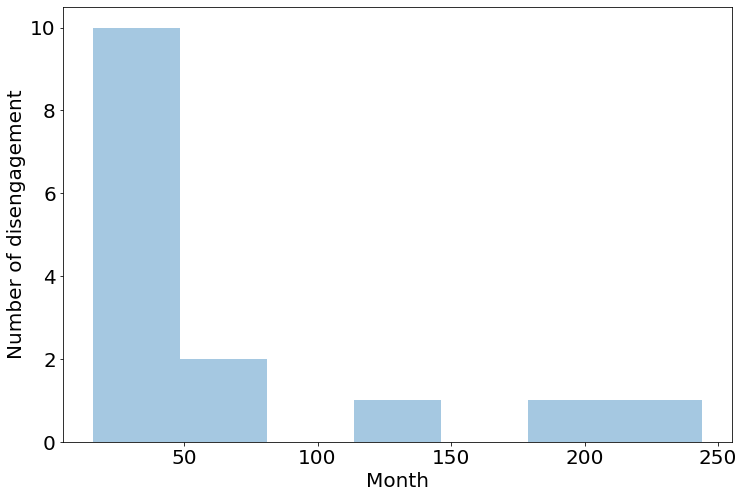

In [46]:
ax = sns.distplot(disengagements.groupby('Month').count()['Car'], kde=False)
ax.set_xlabel('Month')
ax.set_ylabel('Number of disengagement')
plt.show()

###  Does this distribution fit any known distributions (Gaussian, Weibull,Exponential)?

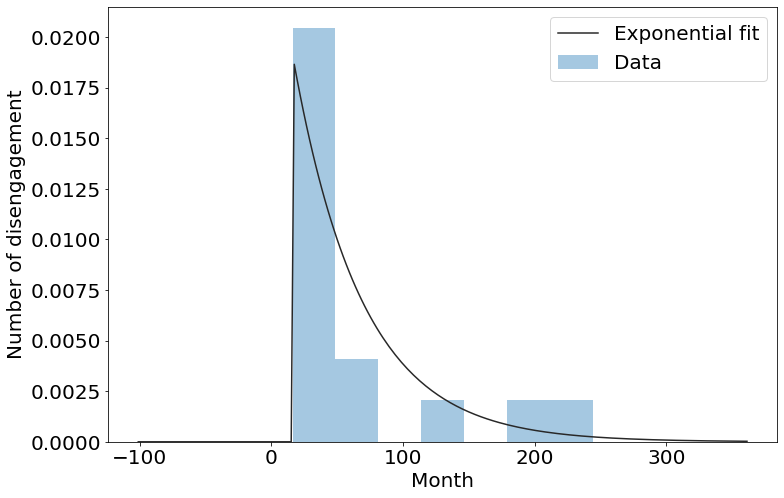

In [47]:
ax = sns.distplot(disengagements.groupby('Month').count()['Car'], kde=False, fit=st.expon)#,bins=10)
ax.set_xlabel('Month')
ax.set_ylabel('Number of disengagement')
plt.legend(['Exponential fit', 'Data'])
plt.show()

###  What does the distribution that fits signify?

#### Since it fits the exponential distribution pretty well, ...

# Task 2 – Probabilistic Analysis of AV Disengagement

## Question 1. Based on the above assumptions, answer the following questions on basic probability.

###  a. The assumption on maximum number of disengagements in a mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a _________________ distribution.

####  binomial

###  b. Based on the above assumptions, calculate the probability of disengagement per mile on a cloudy day.

In [48]:
# number of dis on cloudy day / # miles  driven on cloudy day (72% miles are cloudy?)
# ???????????????????????????????????????????????????????????????????????????????????
total_number_of_disengagement_on_cloudy_day = sum(list(disengagements.loc[disengagements['Weather'] == 'cloudy'].groupby('Car')['Weather'].count()))
total_number_of_miles_driven_on_cloudy_day = sum(list(totalmiles.groupby('Car')['miles driven in autonomous mode'].sum())) * (1 - 0.72)
print('Probability of disengagement per mile on a cloudy day:')
print(total_number_of_disengagement_on_cloudy_day/total_number_of_miles_driven_on_cloudy_day)

Probability of disengagement per mile on a cloudy day:
0.005902556775527249


###  c. Based on the above assumptions, calculate the probability of disengagement per mile on a clear day.

In [49]:
total_number_of_disengagement_on_clear_day = sum(list(disengagements.loc[disengagements['Weather'] == 'clear'].groupby('Car')['Weather'].count()))
total_number_of_miles_driven_on_clear_day = sum(list(totalmiles.groupby('Car')['miles driven in autonomous mode'].sum())) * 0.72
print('Probability of disengagement per mile on a clear day:')
print(total_number_of_disengagement_on_clear_day/total_number_of_miles_driven_on_clear_day)

Probability of disengagement per mile on a clear day:
0.0005195663748517998


###  d. Similarly, calculate the probability of an automatic disengagement per mile on a cloudy day, and the probability of an automatic disengagement per mile on a clear day.

In [20]:
total_number_of_auto_disengagement_on_cloudy_day = sum(list(disengagements.loc[disengagements['Weather'] == 'cloudy'].loc[disengagements['TypeOfTrigger'] == 'automatic'].groupby('Car')['Weather'].count()))
total_number_of_miles_driven_on_cloudy_day = sum(list(totalmiles.groupby('Car')['miles driven in autonomous mode'].sum())) * (1 - 0.72)
print('Probability of an automatic disengagement per mile on a cloudy day:')
print(total_number_of_auto_disengagement_on_cloudy_day/total_number_of_miles_driven_on_cloudy_day)

Probability of an automatic disengagement per mile on a cloudy day:
0.0028063653172267283


In [19]:
total_number_of_auto_disengagement_on_clear_day = sum(list(disengagements.loc[disengagements['Weather'] == 'clear'].loc[disengagements['TypeOfTrigger'] == 'automatic'].groupby('Car')['Weather'].count()))
total_number_of_miles_driven_on_clear_day = sum(list(totalmiles.groupby('Car')['miles driven in autonomous mode'].sum())) * 0.72
print('Probability of an automatic disengagement per mile on a clear day:')
print(total_number_of_auto_disengagement_on_clear_day/total_number_of_miles_driven_on_clear_day)

Probability of an automatic disengagement per mile on a clear day:
0.00026390673008345393


###  e. How likely is it that in 12000 miles, there are 150 or more disengagements under cloudy conditions? [Hint: Think of an appropriate approximation that makes the computation feasible/easier.]

In [54]:
n = 12000
p = total_number_of_disengagement_on_cloudy_day/total_number_of_miles_driven_on_cloudy_day
miu = n * p
sigma = np.sqrt(n * p * (1 - p))
z = (150 - miu)/sigma
p_val = st.norm.sf(abs(z))
print('Probability of in 12000 miles, there are 150 or more disengagements under cloudy conditions:')
print(p_val)

Probability of in 12000 miles, there are 150 or more disengagements under cloudy conditions:
1.9591016830538447e-21


## Question 2. Answer the following question about hypothesis testing:

###  a. What does the normal distribution represent in the hypothesis testing?

####  what?

###  b. Does rejecting the null hypothesis mean accepting the alternative hypothesis? Explain your answer.

####  Yes? 

## Question 3. At a 0.05 significance level, test the following hypothesis:  [Hint: Use a Z-test for testing this hypothesis].

###  The AV has more disengagements (automatic and manual) on cloudy days than clear days. 

In [55]:
#Two Proportion Z-Test
p1 = total_number_of_disengagement_on_cloudy_day/total_number_of_miles_driven_on_cloudy_day
p2 = total_number_of_disengagement_on_clear_day/total_number_of_miles_driven_on_clear_day
p_overall = (total_number_of_disengagement_on_cloudy_day + total_number_of_disengagement_on_clear_day) / (total_number_of_miles_driven_on_cloudy_day + total_number_of_miles_driven_on_clear_day)
z = ((p1 - p2) - 0) / np.sqrt(p_overall * (1-p_overall) * (1/total_number_of_miles_driven_on_cloudy_day + 1/total_number_of_miles_driven_on_clear_day))
p_val = st.norm.sf(abs(z))

print(p_val)

0.0


###  Based on the result of the hypothesis test, what can you conclude about the impact of weather conditions on AV safety?

####  Since p value is smaller than 0.05, we reject the null and conclude that the AV has more disengagements (automatic and manual) on cloudy days than clear days.

## Question 4. What’s the conditional probability that the reaction time is: (Hint, there might be multiple conditions to consider.)

###  a. Greater than 0.6s given that the weather was cloudy? Reaction time is measured only in cases where there was an automatic disengagement.

In [17]:
number_of_disengagement_in_cloudy_day = disengagements.dropna().loc[disengagements['Weather'] == 'cloudy']['Month'].count()
number_of_disengagement_with_reaction_time_greater_than_point_six_in_cloudy_day = disengagements.dropna().loc[disengagements['Weather'] == 'cloudy'].loc[disengagements['ReactionTime'].astype('float64') > 0.6]['Month'].count()
print('Probability that reaction time is greater than 0.6s given that the weather was cloudy:')
print(number_of_disengagement_with_reaction_time_greater_than_point_six_in_cloudy_day/number_of_disengagement_in_cloudy_day)

Probability that reaction time is greater than 0.6s given that the weather was cloudy:
0.47474747474747475


###  b. Greater than 0.9s given the weather was clear? Reaction time is measured only in cases where there was an automatic disengagement.

In [18]:
number_of_disengagement_in_cloudy_day = disengagements.dropna().loc[disengagements['Weather'] == 'clear']['Month'].count()
number_of_disengagement_with_reaction_time_greater_than_point_six_in_cloudy_day = disengagements.dropna().loc[disengagements['Weather'] == 'clear'].loc[disengagements['ReactionTime'].astype('float64') > 0.9]['Month'].count()
print('Probability that reaction time is greater than 0.9s given that the weather was clear:')
print(number_of_disengagement_with_reaction_time_greater_than_point_six_in_cloudy_day/number_of_disengagement_in_cloudy_day)

Probability that reaction time is greater than 0.9s given that the weather was clear:
0.28125


## Question 5. A study found that an automatic AV disengagement will result in an accident if the human driver is slow in reacting. Following reactions are considered slow: (i) a reaction time greater than 0.6s under cloudy conditions and, (ii) a reaction time greater than 0.9s under clear conditions. Find the probability of an accident per mile involving an AV disengagement. [Hint: Use the theorem of total probability to express the probability of an accident per mile as a sum of the conditional probabilities calculated in the previous questions in this task].

In [58]:
#P(accident? per mile | AV disengagement) what is accident?


## Question 6. The probability of a human driver causing a car accident is 2x10-6 [4]. How do AVs compare to human drivers? Justify your conclusion and explain its consequences.

###  answer

## Question 7. The hypothesis test you performed in this task is an example of a parametric test that assumes that the observed data is distributed similarly to some other well-known distribution (such as a normal distribution). However, sometimes, we need to compare two distributions of data that don’t follow any such well-known distributions. Perform a two-sample Kolmogorov-Smirnov test (using the ks_2samp package from Scipy) to compare the following two distributions: (1) distribution of disengagement reaction time when the weather is cloudy and (2) distribution of disengagement reaction time when the weather is clear. 

### What are your null and alternative hypotheses? 

#### H0: Distribution of disengagement reaction time when the weather is cloudy and distribution of disengagement reaction time when the weather is clear are the same.
#### Ha: distribution of disengagement reaction time when the weather is cloudy and distribution of disengagement reaction time when the weather is clear are different.

###  Assuming a significance level threshold of 0.1, what can you conclude from the test results about the impact of weather conditions on disengagement reaction time?

In [59]:
distribution_of_disengagement_reaction_time_cloudy = list(disengagements.loc[disengagements['Weather'] == 'cloudy'].dropna()['ReactionTime'])
distribution_of_disengagement_reaction_time_clear = list(disengagements.loc[disengagements['Weather'] == 'clear'].dropna()['ReactionTime'])
st.ks_2samp(distribution_of_disengagement_reaction_time_cloudy, distribution_of_disengagement_reaction_time_clear)

Ks_2sampResult(statistic=0.05145202020202011, pvalue=0.9843290571186449)

####  Since P value = 0.98 > 0.1, we fail to reject the null, and conclude that the distribution of reaction time in cloudy and clear day are the same.

# Task 3 - Using the Naive Bayes Model

## Question 1. Though there are 10 different causes for disengagement, they can be grouped into the following 3 classes – (i) Controller, (ii) Perception System, and (iii) Computer System. The mapping from Disengagement Cause to Class is given in the table below. You will use these 3 classes as the labels in the NB model. Modify your pandas data frame to include a ‘Class’ column.

In [3]:
disengagements['Class'] = [
    'Controller' if x == 'Incorrect behavior prediction of others' or x == 'Recklessly behaving agent' or x =='Unwanted Driver Discomfort'
    else (
    'Perception System' if x == 'Adverse road surface conditions' or x == 'Emergency Vehicle' or x == 'Position Estimation Failure' or x == 'Incorrect Traffic Light Detection'
    else
    'Computer System'
    )
    for x in disengagements['Cause']
]
disengagements.head()

Month                Car      Location Weather TypeOfTrigger  \
0  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
1  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
2  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
3  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
4  14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   

   ReactionTime                              Cause              Class  
0          0.58  Incorrect Traffic Light Detection  Perception System  
1          0.66    Adverse road surface conditions  Perception System  
2          1.93        Position Estimation Failure  Perception System  
3          0.65                  Emergency Vehicle  Perception System  
4          0.64    Adverse road surface conditions  Perception System

## Question 2. Split the data randomly into training and testing (80-20 split). Use the fields ‘Location’, ‘Weather’, and ‘TypeOfTrigger’ as features and use ‘Class’ as assigned in the previous question as the label.

In [128]:
sub_df = disengagements[['Location', 'Weather', 'TypeOfTrigger', 'Class']]
sub_df.insert(0, 'id', range(len(sub_df)))

random_array_ids =  [i for i in range(len(sub_df))]
np.random.shuffle(random_array_ids)
training_amount = int(0.8*len(sub_df))

training_ids = random_array_ids[:training_amount]
testing_ids = random_array_ids[training_amount:]

training_df = sub_df.loc[sub_df['id'].isin(training_ids)][['Location', 'Weather', 'TypeOfTrigger', 'Class']]
testing_df = sub_df.loc[sub_df['id'].isin(testing_ids)][['Location', 'Weather', 'TypeOfTrigger', 'Class']]

training_df.head()
testing_df.head()

Location Weather TypeOfTrigger            Class
18  urban-street  cloudy        manual       Controller
20  urban-street  cloudy        manual       Controller
21  urban-street  cloudy        manual       Controller
26  urban-street  cloudy        manual  Computer System
33  urban-street  cloudy        manual  Computer System

## Question 3. Using the training dataset, create a NB model to identify the cause of disengagement based on the features ‘Location’, ‘Weather’, and ‘TypeOfTrigger’. Show the conditional probability tables from the training dataset.

In [133]:
#https://en.wikipedia.org/wiki/Naive_Bayes_classifier
p = {}
row_count = training_df['Class'].size
p['clear'] = training_df.loc[training_df['Weather'] == 'clear']['Class'].count() / row_count
p['cloudy'] = training_df.loc[training_df['Weather'] == 'cloudy']['Class'].count() / row_count
p['highway'] = training_df.loc[training_df['Location'] == 'highway']['Class'].count() / row_count
p['urban-street'] = training_df.loc[training_df['Location'] == 'urban-street']['Class'].count() / row_count
p['automatic'] = training_df.loc[training_df['TypeOfTrigger'] == 'automatic']['Class'].count() / row_count
p['manual'] = training_df.loc[training_df['TypeOfTrigger'] == 'manual']['Class'].count() / row_count
p['Perception System'] = training_df.loc[training_df['Class'] == 'Perception System']['Class'].count() / row_count
p['Computer System'] = training_df.loc[training_df['Class'] == 'Computer System']['Class'].count() / row_count
p['Controller'] = training_df.loc[training_df['Class'] == 'Controller']['Class'].count() / row_count

p[('Perception System','cloudy')] = training_df.loc[(training_df['Class'] == 'Perception System') & (training_df['Weather'] == 'cloudy')]['Class'].count() / p['Perception System'] / row_count #* p['Perception System'] / p['cloudy']
p[('Perception System','clear')] = training_df.loc[(training_df['Class'] == 'Perception System') & (training_df['Weather'] == 'clear')]['Class'].count() / p['Perception System'] / row_count #* p['Perception System'] / p['clear']
p[('Perception System','highway')] = training_df.loc[(training_df['Class'] == 'Perception System') & (training_df['Location'] == 'highway')]['Class'].count() / p['Perception System'] / row_count #* p['Perception System'] / p['highway']
p[('Perception System','urban-street')] = training_df.loc[(training_df['Class'] == 'Perception System') & (training_df['Location'] == 'urban-street')]['Class'].count() / p['Perception System'] / row_count# * p['Perception System'] / p['urban-street']
p[('Perception System','automatic')] = training_df.loc[(training_df['Class'] == 'Perception System') & (training_df['TypeOfTrigger'] == 'automatic')]['Class'].count() / p['Perception System'] / row_count# * p['Perception System'] / p['automatic']
p[('Perception System','manual')] = training_df.loc[(training_df['Class'] == 'Perception System') & (training_df['TypeOfTrigger'] == 'manual')]['Class'].count() / p['Perception System'] / row_count# * p['Perception System'] / p['manual']

p[('Computer System','cloudy')] = training_df.loc[(training_df['Class'] == 'Computer System') & (training_df['Weather'] == 'cloudy')]['Class'].count() / p['Computer System'] / row_count# * p['Computer System'] / p['cloudy']
p[('Computer System','clear')] = training_df.loc[(training_df['Class'] == 'Computer System') & (training_df['Weather'] == 'clear')]['Class'].count() / p['Computer System'] / row_count #* p['Computer System'] / p['clear']
p[('Computer System','highway')] = training_df.loc[(training_df['Class'] == 'Computer System') & (training_df['Location'] == 'highway')]['Class'].count() / p['Computer System'] / row_count #* p['Computer System'] / p['highway']
p[('Computer System','urban-street')] = training_df.loc[(training_df['Class'] == 'Computer System') & (training_df['Location'] == 'urban-street')]['Class'].count() / p['Computer System'] / row_count #* p['Computer System'] / p['urban-street']
p[('Computer System','automatic')] = training_df.loc[(training_df['Class'] == 'Computer System') & (training_df['TypeOfTrigger'] == 'automatic')]['Class'].count() / p['Computer System'] / row_count#* p['Computer System'] / p['automatic']
p[('Computer System','manual')]  = training_df.loc[(training_df['Class'] == 'Computer System') & (training_df['TypeOfTrigger'] == 'manual')]['Class'].count() / p['Computer System'] / row_count# * p['Computer System'] / p['manual']

p[('Controller','cloudy')] = training_df.loc[(training_df['Class'] == 'Controller') & (training_df['Weather'] == 'cloudy')]['Class'].count() / p['Controller'] / row_count #* p['Controller'] / p['cloudy']
p[('Controller','clear')] = training_df.loc[(training_df['Class'] == 'Controller') & (training_df['Weather'] == 'clear')]['Class'].count() / p['Controller'] / row_count #* p['Controller'] / p['clear']
p[('Controller','highway')] = training_df.loc[(training_df['Class'] == 'Controller') & (training_df['Location'] == 'highway')]['Class'].count() / p['Controller'] / row_count #* p['Controller'] / p['highway']
p[('Controller','urban-street')] = training_df.loc[(training_df['Class'] == 'Controller') & (training_df['Location'] == 'urban-street')]['Class'].count() / p['Controller'] / row_count #* p['Controller'] / p['urban-street']
p[('Controller','automatic')] = training_df.loc[(training_df['Class'] == 'Controller') & (training_df['TypeOfTrigger'] == 'automatic')]['Class'].count() / p['Controller'] / row_count#* p['Controller'] / p['automatic']
p[('Controller','manual')]  = training_df.loc[(training_df['Class'] == 'Controller') & (training_df['TypeOfTrigger'] == 'manual')]['Class'].count() / p['Controller'] / row_count #* p['Controller'] / p['manual']
 
print(p)
def NB(Weather, Location, TypeOfTrigger):
    evidence = p['Perception System'] * p[('Perception System', Weather)] * p[('Perception System', Location)] * p[('Perception System', TypeOfTrigger)] + p['Computer System'] * p[('Computer System', Weather)] * p[('Computer System', Location)] * p[('Computer System', TypeOfTrigger)] + p['Controller'] * p[('Controller', Weather)] * p[('Controller', Location)] * p[('Controller', TypeOfTrigger)] 
    ps = []
    ps.append(('Perception System', p[('Perception System', Weather)] * p[('Perception System', Location)] * p[('Perception System', TypeOfTrigger)] * p['Perception System'] / evidence))
    ps.append(('Computer System', p[('Computer System', Weather)] * p[('Computer System', Location)] * p[('Computer System', TypeOfTrigger)] * p['Computer System'] / evidence))    
    ps.append(('Controller', p[('Controller', Weather)] * p[('Controller', Location)] * p[('Controller', TypeOfTrigger)] * p['Controller'] / evidence)) 
    ps = sorted(ps, key = lambda x : x[1])[::-1]
    return ps[0][0]

def NB_print(Weather, Location, TypeOfTrigger):
    evidence = p['Perception System'] * p[('Perception System', Weather)] * p[('Perception System', Location)] * p[('Perception System', TypeOfTrigger)] + p['Computer System'] * p[('Computer System', Weather)] * p[('Computer System', Location)] * p[('Computer System', TypeOfTrigger)] + p['Controller'] * p[('Controller', Weather)] * p[('Controller', Location)] * p[('Controller', TypeOfTrigger)] 
    ps = []
    ps.append(('Perception System', p[('Perception System', Weather)] * p[('Perception System', Location)] * p[('Perception System', TypeOfTrigger)] * p['Perception System'] / evidence))
    ps.append(('Computer System', p[('Computer System', Weather)] * p[('Computer System', Location)] * p[('Computer System', TypeOfTrigger)] * p['Computer System'] / evidence))    
    ps.append(('Controller', p[('Controller', Weather)] * p[('Controller', Location)] * p[('Controller', TypeOfTrigger)] * p['Controller'] / evidence)) 
    ps = sorted(ps, key = lambda x : x[1])[::-1]
    return ps

print(NB_print('clear','highway','automatic'))
print(NB_print('cloudy','highway','automatic'))
print(NB_print('clear','urban-street','automatic'))
print(NB_print('cloudy','urban-street','automatic'))
print(NB_print('clear','highway','manual'))
print(NB_print('cloudy','highway','manual'))
print(NB_print('clear','urban-street','manual'))
print(NB_print('cloudy','urban-street','manual'))

#conditional probability tables???????????????????

{'clear': 0.18315018315018314, 'cloudy': 0.8168498168498168, 'highway': 0.019536019536019536, 'urban-street': 0.9804639804639804, 'automatic': 0.47741147741147744, 'manual': 0.5225885225885226, 'Perception System': 0.3443223443223443, 'Computer System': 0.30036630036630035, 'Controller': 0.3553113553113553, ('Perception System', 'cloudy'): 1.0, ('Perception System', 'clear'): 0.0, ('Perception System', 'highway'): 0.0, ('Perception System', 'urban-street'): 1.0, ('Perception System', 'automatic'): 0.8156028368794327, ('Perception System', 'manual'): 0.1843971631205674, ('Computer System', 'cloudy'): 0.3943089430894309, ('Computer System', 'clear'): 0.6056910569105691, ('Computer System', 'highway'): 0.06504065040650407, ('Computer System', 'urban-street'): 0.9349593495934959, ('Computer System', 'automatic'): 0.508130081300813, ('Computer System', 'manual'): 0.491869918699187, ('Controller', 'cloudy'): 0.9965635738831614, ('Controller', 'clear'): 0.003436426116838488, ('Controller', 'h

## Question 4. Using the model to predict the cause of the disengagement for the test dataset. Compute the accuracy achieved by your model.

In [130]:
def classify(row):
    return NB(row['Weather'], row['Location'], row['TypeOfTrigger'])
testing_df['NB Class'] = testing_df.apply(classify, axis=1)
expected = list(testing_df['NB Class'])
actual = list(testing_df['Class'])
count = 0
for i in range(len(expected)):
    if expected[i] != actual[i]:
        count += 1
print("NB classifier's accuracy is:")
print(1 - count / len(expected))

NB classifier's accuracy is:
0.8195121951219513


## Question 5. To get a better estimate of the model performance, perform cross-validation. Repeat sub-questions 2, 3 and 4 five times for different splits of training and test data, and report the average accuracy.

In [131]:
print('Average accuaracy is:')
print(np.mean([0.8243902439024391, 0.8048780487804879, 0.8292682926829268, 0.7804878048780488, 0.8195121951219513]))

Average accuaracy is:
0.8117073170731708


## Question 6. Is the NB model doing better than chance? Explain.

###  Yes as the average accuarcy is over 80%

## Question 7. What are the assumptions in NB in the context of this problem? Are the assumptions realistic? Explain.

###  A day's weather, car's location and type of disengagement are independent.  Type of disengagement might not be independent of the other two since human might pull the trigger more oftenly on bad weather and highway.

## Question 8. Based on your answer to part 7, comment on whether any improvements can be gained in classification accuracy. If yes, how?

###  answer